# Scikit-Learn (Sklearn): Modelling Process
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. 
Scikit-Learn provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. 
Sckit-Learn library is largely written in Python. It is built upon NumPy, SciPy, and Matplotlib.

We discuss the modelling process involved in Sklearn. Let us understand about the same in detail and begin with dataset loading.

## Dataset Loading
A collection of data is called dataset. It is having the following two components −

- **Features** − The variables of data are called its features. They are also known as predictors, inputs or attributes.
    - **Feature matrix** − It is the collection of features, in case there are more than one.
    - **Feature Names** − It is the list of all the names of the features.

- **Response** − It is the output variable that basically depends upon the feature variables. They are also known as target, label or output.
    - **Response Vector** − It is used to represent response column. Generally, we have just one response column.
    - **Target Names** − It represent the possible values taken by a response vector.

Scikit-learn have few example datasets like **iris** and **digits** for classification and the **Boston house prices** for regression.

In [3]:
from sklearn.datasets import load_iris # Load iris data from sklearn web site.
iris = load_iris()
# The orginal sklearn data set is fromm 
# https://github.com/scikit-learn/scikit-learn/tree/master/sklearn/datasets/data
#
# After dataset is loaded, sklearn store the dataset in your local drive:
# C:\Users\14088\anaconda3\Lib\site-packages\sklearn\datasets\data
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])
print("\nFirst 10 rows of y:\n", y[50:60])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

First 10 rows of y:
 [1 1 1 1 1 1 1 1 1 1]


# Splitting the dataset

To check the accuracy of our model, we can split the dataset into two pieces-a training set and a testing set. Use the training set to train the model and testing set to test the model. After that, we can evaluate how well our model did.

## Example
The following example will split the data into 70:30 ratio, i.e. 70% data will be used as training data and 30% will be used as testing data. The dataset is iris dataset as in above example.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1
)

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (105, 4)
X_test.shape: (45, 4)
y_train.shape: (105,)
y_test.shape: (45,)


## Note:
As seen in the example above, it uses train_test_split() function of scikit-learn to split the dataset. This function has the following arguments −

- X, y − Here, X is the feature matrix and y is the response vector, which need to be split.
- test_size − This represents the ratio of test data to the total given data. As in the above example, we are setting test_data = 0.3 for 150 rows of X. It will produce test data of 150*0.3 = 45 rows.
- random_size − It is used to guarantee that the split will always be the same. This is useful in the situations where you want reproducible results.

## Train the Model

Next, we can use our dataset to train some prediction-model. As discussed, scikit-learn has wide range of Machine Learning (ML) algorithms which have a consistent interface for fitting, predicting accuracy, recall etc.

## Example

In the example below, we are going to use KNN (K nearest neighbors) classifier. 
Don’t go into the details of KNN algorithms, we will discuss detail in later discussion. 
This example is used to make you understand what is the purpose of scikit-learn.

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.4, random_state=1
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Providing sample data and the model will make prediction out of that data

sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species)

Accuracy: 0.9833333333333333
Predictions: ['versicolor', 'virginica']


## Model Persistence

Once you train the model, the model should be persist for future use so that we do not need to retrain it again and again.

It can be done with the help of **dump** and **load** features of **joblib** package.

Consider the example below in which we will be saving the above trained model (classifier_knn) for future use −

    from sklearn.externals import joblib
    joblib.dump(classifier_knn, 'iris_classifier_knn.joblib')

The above code will save the model into file named iris_classifier_knn.joblib. Now, the object can be reloaded from the file with the help of following code −

    joblib.load('iris_classifier_knn.joblib')
    
## Preprocessing the Data
As we are dealing with lots of data and that data is in raw form, before inputting that data to machine learning algorithms, we need to convert it into meaningful data. This process is called preprocessing the data. Scikit-learn has package named preprocessing for this purpose. The preprocessing package has the following techniques −

## Binarization
This preprocessing technique is used when we need to convert our numerical values into Boolean values.

## Example

In [12]:
import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In the above example, we used threshold value = 0.5.
All the values above 0.5 would be converted to 1, and all the values below 0.5 would be converted to 0.

# Mean Removal
This technique is used to eliminate the mean from feature vector so that every feature centered on zero.

## Example

In [18]:
import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)

#displaying the mean and the standard deviation of the input data
# (2.1 -1.5 + 0.5 + 5.9)/4 = 1.75, (-1.9+2.4-7.9+2.3)/4 = -1.275, ...
print("Mean =", input_data.mean(axis=0))
print("Std Deviation = ", input_data.std(axis=0))
# std = square-root {[sum(Xi- Mean)^2]/N }
#Removing the mean and the standard deviation of the input data

data_scaled = preprocessing.scale(input_data)
print("Mean Removed =", data_scaled.mean(axis=0))
print("Std Deviation Removed =", data_scaled.std(axis=0))

Mean = [ 1.75  -1.275  2.2  ]
Std Deviation =  [2.71431391 4.20022321 4.69414529]
Mean Removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Std Deviation Removed = [1. 1. 1.]


# Scaling
We use this preprocessing technique for scaling the feature vectors. 
Scaling of feature vectors is important,
The features should not be too large or small to cause the truncation or inversion error.

## Example

In [21]:
import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print ("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


# Normalization
We use this preprocessing technique for modifying the feature vectors. 
Normalization of feature vectors is necessary so that the feature vectors can be measured at common scale. 
There are two types of normalization as follows −

## L1 Normalization
It is also called Least Absolute Deviations. 
It modifies the value in such a manner that the sum of the absolute values remains always up to 1 in each row. 
Following example shows the implementation of L1 normalisation on input data.

## Example

In [46]:
import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
# Sum [abs (x)]
print("\nL1 normalized data:\n", data_normalized_l1)

x = np.array([ 0.22105263, -0.2027027,  0.03571429, 0.42142857])
print('x:', x)
x2 = np.absolute (x)
print('x2:', x2)
print('np.sum(x2):', np.sum(x2)) 
# L1 take for each row of data.
x = np.array([ 0.22105263, -0.2,  0.57894737])
print('x:', x)
x2 = np.absolute (x)
print('x2:', x2)
print('np.sum(x2):', np.sum(x2))


L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]
x: [ 0.22105263 -0.2027027   0.03571429  0.42142857]
x2: [0.22105263 0.2027027  0.03571429 0.42142857]
np.sum(x2): 0.8808981899999999
x: [ 0.22105263 -0.2         0.57894737]
x2: [0.22105263 0.2        0.57894737]
np.sum(x2): 1.0


# L2 Normalization
Also called Least Squares. 
It modifies the value in such a manner that the sum of the squares remains always up to 1 in each row. 

Following example shows the implementation of L2 normalization on input data.

## Example

In [45]:
import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
# https://mathworld.wolfram.com/L2-Norm.html
# abs(x) = square-root {sum (Xk)^2}
print("\nL1 normalized data:\n", data_normalized_l2)
x = np.array([ 0.33946114, -0.33325106,  0.05156558, 0.68706914])
print('x:', x)
x2 = np.square (x)
print('x2:', x2)
print('np.sum(x2):', np.sum(x2)) 
# L2 take for each row of data.
x = np.array([ 0.33946114, -0.30713151,  0.88906489])
print('x:', x)
x2 = np.square (x)
print('x2:', x2)
print('np.sum(x2):', np.sum(x2)) 


L1 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]
x: [ 0.33946114 -0.33325106  0.05156558  0.68706914]
x2: [0.11523387 0.11105627 0.00265901 0.472064  ]
np.sum(x2): 0.7010131467422991
x: [ 0.33946114 -0.30713151  0.88906489]
x2: [0.11523387 0.09432976 0.79043638]
np.sum(x2): 1.0000000086356917


# Scikit Learn - Data Representation

As we know that machine learning is about to create model from data. 
For this purpose, computer must understand the data first. 
Next, we are going to discuss various ways to represent the data in order to be understood by computer −

## Data as table

The best way to represent data in Scikit-learn is in the form of tables. A table represents a 2-D grid of data where rows represent the individual elements of the dataset and the columns represents the quantities related to those individual elements.

## Example

With the example given below, we can download **iris dataset** in the form of a Pandas DataFrame with the help of python **seaborn** library.

In [49]:
import seaborn as sns
# if you error in cannot find the seaborn, then install seaborn.
# > pip install seaborn
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

From above output, we can see that each row of the data represents a single observed flower.
The number of rows represents the total number of flowers in the dataset. 
Generally, we refer the rows of the matrix as samples.

On the other hand, each column of the data represents a quantitative information describing each sample.
Generally, we refer the columns of the matrix as features.

## Data as Feature Matrix

Features matrix may be defined as the table layout where information can be thought of as a 2-D matrix.
It is stored in a variable named X and assumed to be two dimensional with shape [n_samples, n_features].
Mostly, it is contained in a NumPy array or a Pandas DataFrame. 
As told earlier, the samples always represent the individual objects described by the dataset.
The features represents the distinct observations that describe each sample in a quantitative manner.

## Data as Target array

Along with Features matrix, denoted by X, we also have target array. 
It is also called label. It is denoted by y. 
The label or target array is usually one-dimensional having length n_samples. 
It is generally contained in NumPy array or Pandas Series. 
Target array may have both the values, continuous numerical values and discrete values.

## How target array differs from feature columns?

We can distinguish both by one point that the target array is usually the quantity we want to predict from the data,
i.e., in statistical terms it is the dependent variable.

## Example

In the example below, from iris dataset we predict the species of flower based on the other measurements.
In this case, the Species column would be considered as the feature.

Features: Sepal and Petal
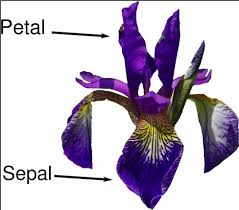

## Note:

## seaborn.pairplot

seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, 
                 kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, 
                 plot_kws=None, diag_kws=None, grid_kws=None, size=None)

Parameters

data: dataframe where each column is a variable and each row is an observation.

hue: name of variable in data

height: Height (in inches) of each facet.
    
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data 
will by shared across the y-axes across a single row and the x-axes across a single column. 
The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. 
You should use PairGrid directly if you need more flexibility.  

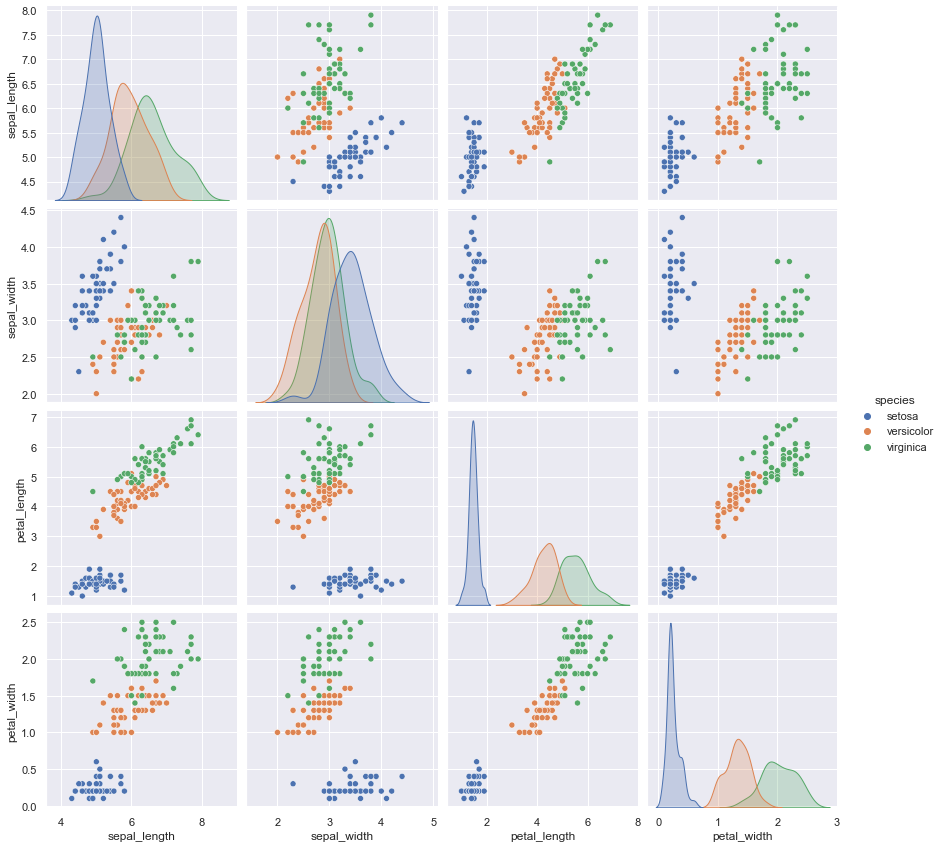

In [57]:
import seaborn as sns
iris = sns.load_dataset('iris')
%matplotlib inline
import seaborn as sns
sns.set()
# Set multiple theme parameters in one step.
sns.pairplot(iris, hue='species', height=3);

In [63]:
X_iris = iris.drop('species', axis=1)
print('X_iris.shape:', X_iris.shape)
y_iris = iris['species']
print('y_iris.shape:', y_iris.shape)

X_iris.shape: (150, 4)
y_iris.shape: (150,)


# Estimator API (Application Programming Interface)

## What is Estimator API
It is one of the main APIs implemented by Scikit-learn. 
It provides a consistent interface for a wide range of ML applications.
All machine learning algorithms in Scikit-Learn are implemented via Estimator API. 
The object that learns from the data (fitting the data) is an estimator. 
It can be used with any of the algorithms like classification, 
regression, clustering or even with a transformer, that extracts useful features from raw data.

For fitting the data, all estimator objects expose a fit method that takes a dataset shown as follows −

    estimator.fit(data)

Next, all the parameters of an estimator can be set, as follows, when it is instantiated by the corresponding attribute.

    estimator = Estimator (param1=1, param2=2)
    
    estimator.param1

The output of the above would be 1.

Once data is fitted with an estimator, parameters are estimated from the data at hand. 

Now, all the estimated parameters will be the attributes of the estimator object ending by an underscore as follows −

    estimator.estimated_param_

## Use of Estimator API

Main uses of estimators are as follows −

Estimation and decoding of a model

Estimator object is used for estimation and decoding of a model. Furthermore, the model is estimated as a deterministic function of the following −

- The parameters which are provided in object construction.
- The global random state (numpy.random) if the estimator’s random_state parameter is set to none.
- Any data passed to the most recent call to fit, fit_transform, or fit_predict.
- Any data passed in a sequence of calls to partial_fit.

Mapping non-rectangular data representation into rectangular data
It maps a non-rectangular data representation into rectangular data. 
In simple words, it takes input where each sample is not represented as an array-like object of fixed length, 
and producing an array-like object of features for each sample.

Distinction between core and outlying samples
It models the distinction between core and outlying samples by using following methods −

- fit
- fit_predict if transductive
- predict if inductive

## Guiding Principles

While designing the Scikit-Learn API, following guiding principles kept in mind −

### Consistency
This principle states that all the objects should share a common interface drawn from a limited set of methods. The documentation should also be consistent.

L### imited object hierarchy
This guiding principle says −

- Algorithms should be represented by Python classes
- Datasets should be represented in standard format like NumPy arrays, Pandas DataFrames, SciPy sparse matrix.
- Parameters names should use standard Python strings.

### Composition
As we know that, ML algorithms can be expressed as the sequence of many fundamental algorithms. Scikit-learn makes use of these fundamental algorithms whenever needed.

### Sensible defaults
According to this principle, the Scikit-learn library defines an appropriate default value whenever ML models require user-specified parameters.

### Inspection
As per this guiding principle, every specified parameter value is exposed as pubic attributes.

## Steps in using Estimator API

Followings are the steps in using the Scikit-Learn estimator API −

- Step 1: Choose a class of model
    
    In this first step, we need to choose a class of model. It can be done by importing the appropriate Estimator class from Scikit-learn.

    
- Step 2: Choose model hyperparameters
    
    In this step, we need to choose class model hyperparameters. It can be done by instantiating the class with desired values.

    
- Step 3: Arranging the data
    
    Next, we need to arrange the data into features matrix (X) and target vector(y).

    
- Step 4: Model Fitting

    Now, we need to fit the model to your data. It can be done by calling fit() method of the model instance.

    
- Step 5: Applying the model

    After fitting the model, we can apply it to new data. For supervised learning, use predict() method to predict the labels for unknown data. While for unsupervised learning, use predict() or transform() to infer properties of the data.

    
# Supervised Learning Example

Here, as an example of this process we are taking common case of fitting a line to (x,y) data i.e. simple linear regression.

First, we need to load the dataset, we are using iris dataset 

In [68]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)
print('X_iris.shape:', X_iris.shape)

X_iris.shape: (150, 4)


In [69]:
y_iris = iris['species']
print('y_iris.shape:', y_iris.shape)

y_iris.shape: (150,)


# Example
Now, for this regression example, we are going to use the following sample data

x.shape: (40,)
x: [4.58054948 3.08349607 2.31487045 2.77424552 8.17234812 1.11346636
 6.26437229 2.76787887 6.82174674 6.78970784 7.96717419 0.45802163
 9.12598274 2.13815986 3.03637301 9.89063623 1.85881503 9.88724835
 7.50084231 2.22386045 1.47903908 5.15790275 3.94258319 0.69880125
 3.3822577  0.11037221 7.67527858 8.7472213  5.33594321 0.8441275
 8.24331196 5.04581195 8.81618627 1.74046285 4.02957886 8.32126544
 9.78662472 6.19164765 8.69920655 2.488769  ]
y.shape: (40,)
y: [ 6.79019494  6.14963548  3.91843975  2.95118047 15.00765095  0.41013779
 12.60843702  4.96491944 11.39543027 11.89728009 15.3692612   1.18260785
 18.00989158  3.2651712   6.39127441 19.91005547  1.98998521 18.41371559
 14.4545511   2.86046448 -1.05856307 10.29811375  5.76809408  0.21071636
  4.58116837  0.09218197 13.38800507 16.67749006  7.33717689  2.50146555
 17.31837692  8.71473606 16.98048488  2.36464414  9.36645189 15.12951779
 17.10420263 10.00400961 17.82510881  6.56636957]


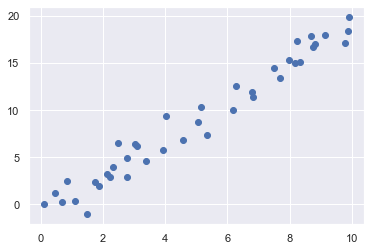

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(35)
# Set method of random number generate method = 35.
x = 10*rng.rand(40)
print('x.shape:', x.shape)
print ('x:', x)
y = 2*x-1+rng.randn(40)
print('y.shape:', y.shape)
print ('y:', y)
plt.scatter(x,y);

So, we have the above data for our linear regression example.

Now, with this data, we can apply the above-mentioned steps.

# Choose a class of model
Here, to compute a simple linear regression model, we need to import the linear regression class as follows −

    from sklearn.linear_model import LinearRegression

# Choose model hyperparameters

Once we choose a class of model, we need to make some important choices which are often represented as hyperparameters, 
or the parameters that must set before the model is fit to data. 
Here, for this example of linear regression, we would like to fit the intercept by using the fit_intercept hyperparameter as follows −

# Example

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
print('model:', model)

model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


# Arranging the data
Now, as we know that our target variable **y** is in correct form, i.e.,
a length n_samples array of 1-D. But, we need to reshape the feature matrix **X** to make it a matrix of size 
**[n_samples, n_features]**. 
It can be done as follows −

# Example

In [78]:
X = x[:, np.newaxis]
print('X.shape:', X.shape)

X.shape: (40, 1)


# Model fitting
Once, we arrange the data, it is time to fit the model i.e. to apply our model to data. 
This can be done with the help of **fit()** method as follows −

# Example

In [80]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In Scikit-learn, the **fit()** process have some trailing underscores.

For this example, the below parameter shows the slope of the simple linear fit of the data −

# Example

In [83]:
print('model.coef_:', model.coef_)

model.coef_: [1.99839352]


The below parameter represents the intercept of the simple linear fit to the data −

# Example

In [84]:
print('model.intercept_:', model.intercept_)

model.intercept_: -0.9895459457775022


# Applying the model to new data
After training the model, we can apply it to new data. 
As the main task of supervised machine learning is to evaluate the model based on new data that is not the part of the training set. 
It can be done with the help of **predict()** method as follows −

# Example

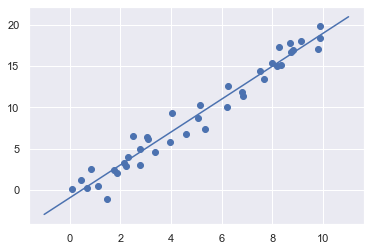

In [85]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Complete working/executable example

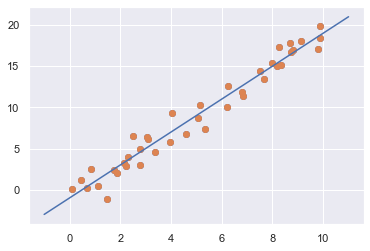

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)
X_iris.shape
y_iris = iris['species']
y_iris.shape

rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40)
plt.scatter(x,y);
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model
X = x[:, np.newaxis]
X.shape

model.fit(X, y)
model.coef_
model.intercept_

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Unsupervised Learning Example
Here, as an example of this process we are taking common case of reducing the dimensionality of the Iris dataset so that we can visualize it more easily. For this example, we are going to use principal component analysis (PCA), a fast-linear dimensionality reduction technique.

Like the above given example, we can load and plot the random data from iris dataset. After that we can follow the steps as below −

# Choose a class of model

In [87]:
from sklearn.decomposition import PCA

# Choose model hyperparameters
# Example

In [89]:
model = PCA(n_components=2)
model

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Model fitting
# Example

In [90]:
model.fit(X_iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Transform the data to two-dimensional
# Example

In [91]:
X_2D = model.transform(X_iris)

Now, we can plot the result as follows 

C:\Users\14088\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


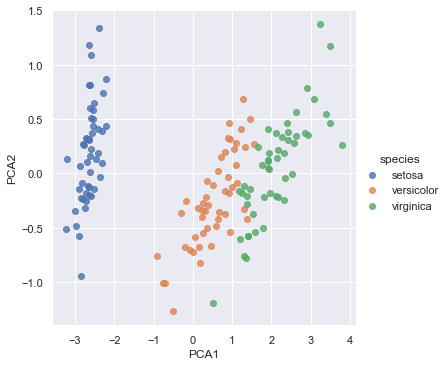

In [103]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data = iris, fit_reg = False);

# lm: Linear Model

# Complete Code example

C:\Users\14088\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


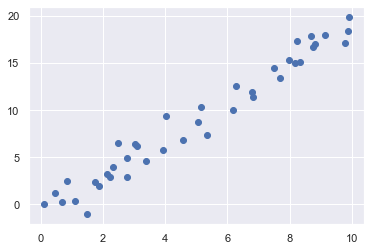

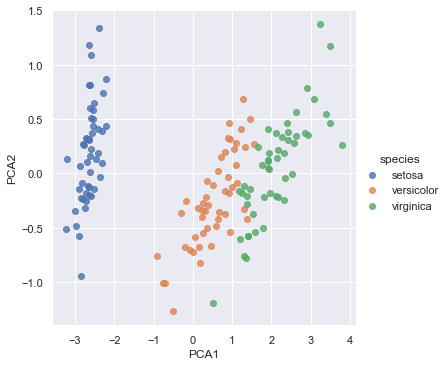

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)
X_iris.shape
y_iris = iris['species']
y_iris.shape
rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40)
plt.scatter(x,y);
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model
model.fit(X_iris)
X_2D = model.transform(X_iris)
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# Scikit Learn - Conventions

Scikit-learn’s objects share a uniform basic API that consists of the following three complementary interfaces −

- Estimator interface − It is for building and fitting the models.

- Predictor interface − It is for making predictions.

- Transformer interface − It is for converting data.

The APIs adopt simple conventions and the design choices have been guided in a manner to avoid the proliferation of framework code.

## Purpose of Conventions
The purpose of conventions is to make sure that the API stick to the following broad principles −

- Consistency − All the objects whether they are basic, or composite must share a consistent interface which further composed of a limited set of methods.

- Inspection − Constructor parameters and parameters values determined by learning algorithm should be stored and exposed as public attributes.

- Non-proliferation of classes − Datasets should be represented as NumPy arrays or Scipy sparse matrix whereas hyper-parameters names and values should be represented as standard Python strings to avoid the proliferation of framework code.

- Composition − The algorithms whether they are expressible as sequences or combinations of transformations to the data or naturally viewed as meta-algorithms parameterized on other algorithms, should be implemented and composed from existing building blocks.

- Sensible defaults − In scikit-learn whenever an operation requires a user-defined parameter, an appropriate default value is defined. This default value should cause the operation to be performed in a sensible way, for example, giving a base-line solution for the task at hand.

## Various Conventions
The conventions available in Sklearn are explained below −

### Type casting
It states that the input should be cast to float64. In the following example, in which sklearn.random_projection module used to reduce the dimensionality of the data, will explain it −

## Example

In [108]:
import numpy as np
from sklearn import random_projection
rannge = np.random.RandomState(0)
X = np.random.rand(10,2000)
X = np.array(X, dtype = 'float32')
print('X.dtype:', X.dtype)
transformer_data = random_projection.GaussianRandomProjection()
X_new = transformer_data.fit_transform(X)
print('X_new.dtype:', X_new.dtype)

X.dtype: float32
X_new.dtype: float64


In the above example, we can see that X is float32 which is cast to float64 by fit_transform(X).

## Refitting & Updating Parameters
Hyper-parameters of an estimator can be updated and refitted after it has been constructed via the set_params() method. Let’s see the following example to understand it −

## Example

In [110]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y = True)
clf = SVC()
clf.set_params(kernel = 'linear').fit(X, y)
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

Once the estimator has been constructed, above code will change the default kernel rbf to linear via SVC.set_params().

Now, the following code will change back the kernel to rbf to refit the estimator and to make a second prediction.

## Example

In [111]:
clf.set_params(kernel = 'rbf', gamma = 'scale').fit(X, y)
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

# Complete code
The following is the complete executable program −

In [112]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y = True)
clf = SVC()
clf.set_params(kernel = 'linear').fit(X, y)
clf.predict(X[:5])
clf.set_params(kernel = 'rbf', gamma = 'scale').fit(X, y)
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

## Multiclass & Multilabel fitting
In case of multiclass fitting, both learning and the prediction tasks are dependent on the format of the target data fit upon. The module used is sklearn.multiclass. Check the example below, where multiclass classifier is fit on a 1d array.

## Example

In [114]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
X = [[1, 2], [3, 4], [4, 5], [5, 2], [1, 1]]
y = [0, 0, 1, 1, 2]
classif = OneVsRestClassifier(estimator = SVC(gamma = 'scale',random_state = 0))
classif.fit(X, y).predict(X)

array([0, 1, 1, 1, 2])

In the above example, classifier is fit on one dimensional array of multiclass labels and the predict() method hence provides corresponding multiclass prediction. But on the other hand, it is also possible to fit upon a two-dimensional array of binary label indicators as follows −

## Example

In [116]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
X = [[1, 2], [3, 4], [4, 5], [5, 2], [1, 1]]
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 0]])

Similarly, in case of multilabel fitting, an instance can be assigned multiple labels as follows −

## Example

In [117]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 0]])

In the above example, sklearn.MultiLabelBinarizer is used to binarize the two dimensional array of multilabels to fit upon. That’s why predict() function gives a 2d array as output with multiple labels for each instance.

# Scikit Learn - Linear Modeling
We learn about the linear modeling in Scikit-Learn. 
Let us begin by understanding what is linear regression in Sklearn.

The following table lists out various linear models provided by Scikit-Learn
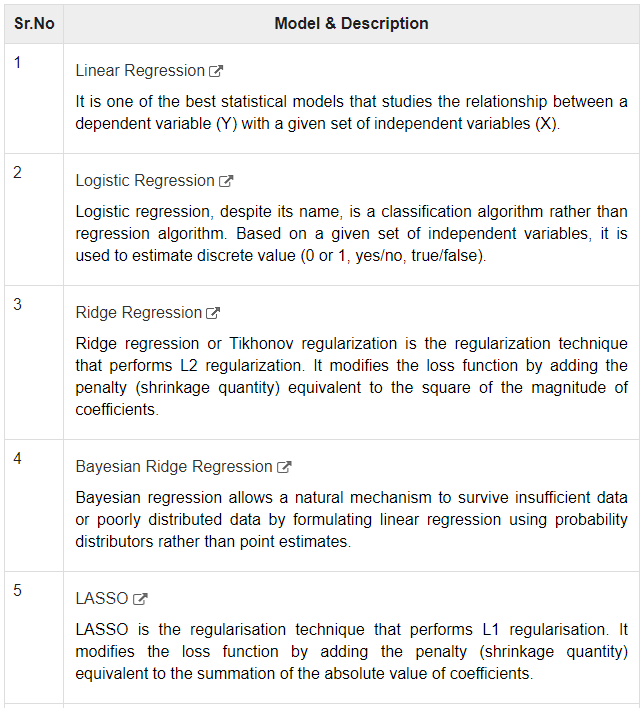
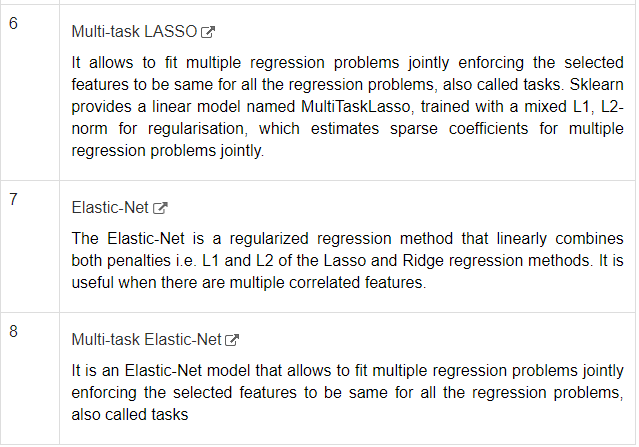

# Scikit Learn - Extended Linear Modeling
Introduction to Polynomial Features
Linear models trained on non-linear functions of data generally maintains the fast performance of linear methods. It also allows them to fit a much wider range of data. That’s the reason in machine learning such linear models, that are trained on nonlinear functions, are used.

One such example is that a simple linear regression can be extended by constructing polynomial features from the coefficients.

Mathematically, suppose we have standard linear regression model then for 2-D data it would look like this −
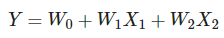

Now, we can combine the features in second-order polynomials and our model will look like as follows
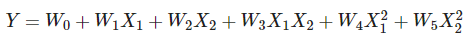

The above is still a linear model. Here, we saw that the resulting polynomial regression is in the same class of linear models and can be solved similarly.

To do so, scikit-learn provides a module named PolynomialFeatures. This module transforms an input data matrix into a new data matrix of given degree.

# Parameters
Followings table consist the parameters used by PolynomialFeatures module
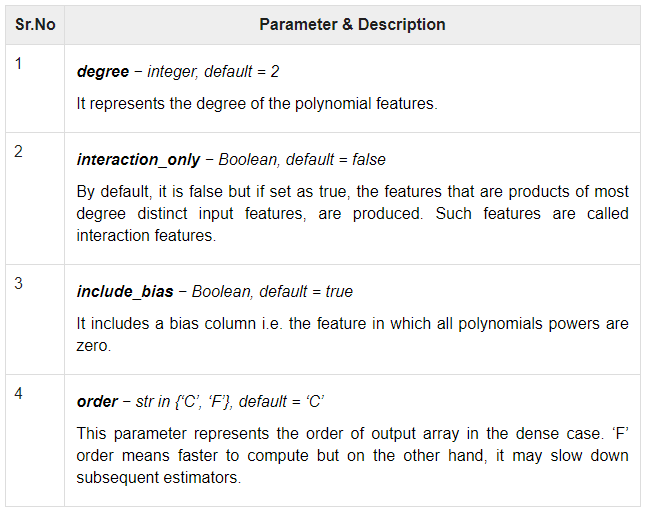

Attributes
Followings table consist the attributes used by PolynomialFeatures module
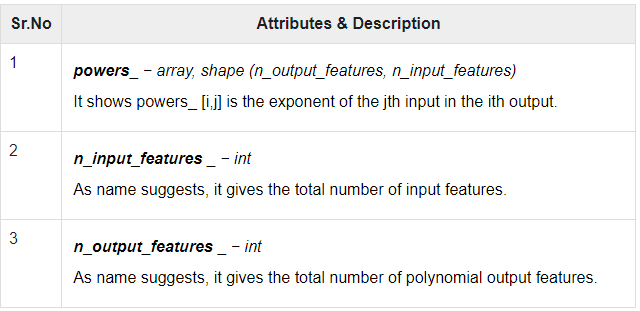

# Implementation Example
Following Python script uses PolynomialFeatures transformer to transform array of 8 into shape (4,2) −

In [118]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
Y = np.arange(8).reshape(4, 2)
poly = PolynomialFeatures(degree=2)
poly.fit_transform(Y)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  6.,  7., 36., 42., 49.]])

# Streamlining using Pipeline tools
The above sort of preprocessing i.e. transforming an input data matrix into a new data matrix of a given degree, can be streamlined with the Pipeline tools, which are basically used to chain multiple estimators into one.
Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator. The most common tool is a Pipeline. Pipeline is often used in combination with FeatureUnion which concatenates the output of transformers into a composite feature space. TransformedTargetRegressor deals with transforming the target (i.e. log-transform y). In contrast, Pipelines only transform the observed data (X).
# Example
The below python scripts using Scikit-learn’s Pipeline tools to streamline the preprocessing (will fit to an order-3 polynomial data).

In [124]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print(__doc__)

# import some data to play with
X, y = make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.LinearSVC()

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

# coef = anova_svm[:-1].inverse_transform(anova_svm['linearsvc'].coef_)
# print(coef)

Automatically created module for IPython interactive environment
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.67      0.67      0.67         3
           2       0.62      0.62      0.62         8
           3       0.75      1.00      0.86         6

   micro avg       0.68      0.68      0.68        25
   macro avg       0.68      0.70      0.68        25
weighted avg       0.67      0.68      0.67        25

